In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

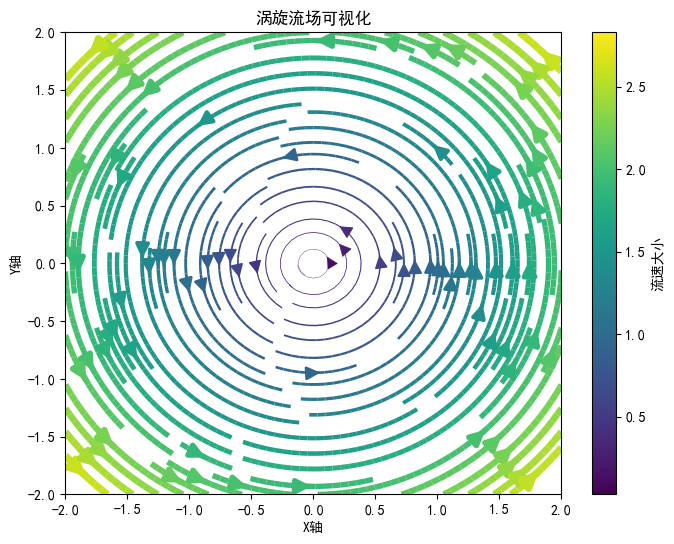

In [3]:
# 创建网格
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# 创建矢量场（一个简单的涡旋场）
U = -Y
V = X
# 计算流速大小
speed = np.sqrt(U**2 + V**2)

# 创建图形
plt.figure(figsize=(8, 6))

# 绘制流线图
streamplot = plt.streamplot(X, Y,                  # 网格点的x、y坐标
                            U, V,                  # 对应网格点的x、y方向速度分量
                            density=(2, 1),        # 流线密度（值越大，流线越多越密集）
                            color=speed,           # 根据流速着色
                            cmap='viridis',        # 颜色映射
                            linewidth=2*speed,     # 根据流速调整线宽
                            arrowsize=2,           # 箭头大小
                            arrowstyle='-|>'       # 箭头样式
                           )

# 添加颜色条
plt.colorbar(streamplot.lines, label='流速大小')

plt.title('涡旋流场可视化')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.show()

# 2、使用示例：

### 示例 1：利用返回值修改流线图样式

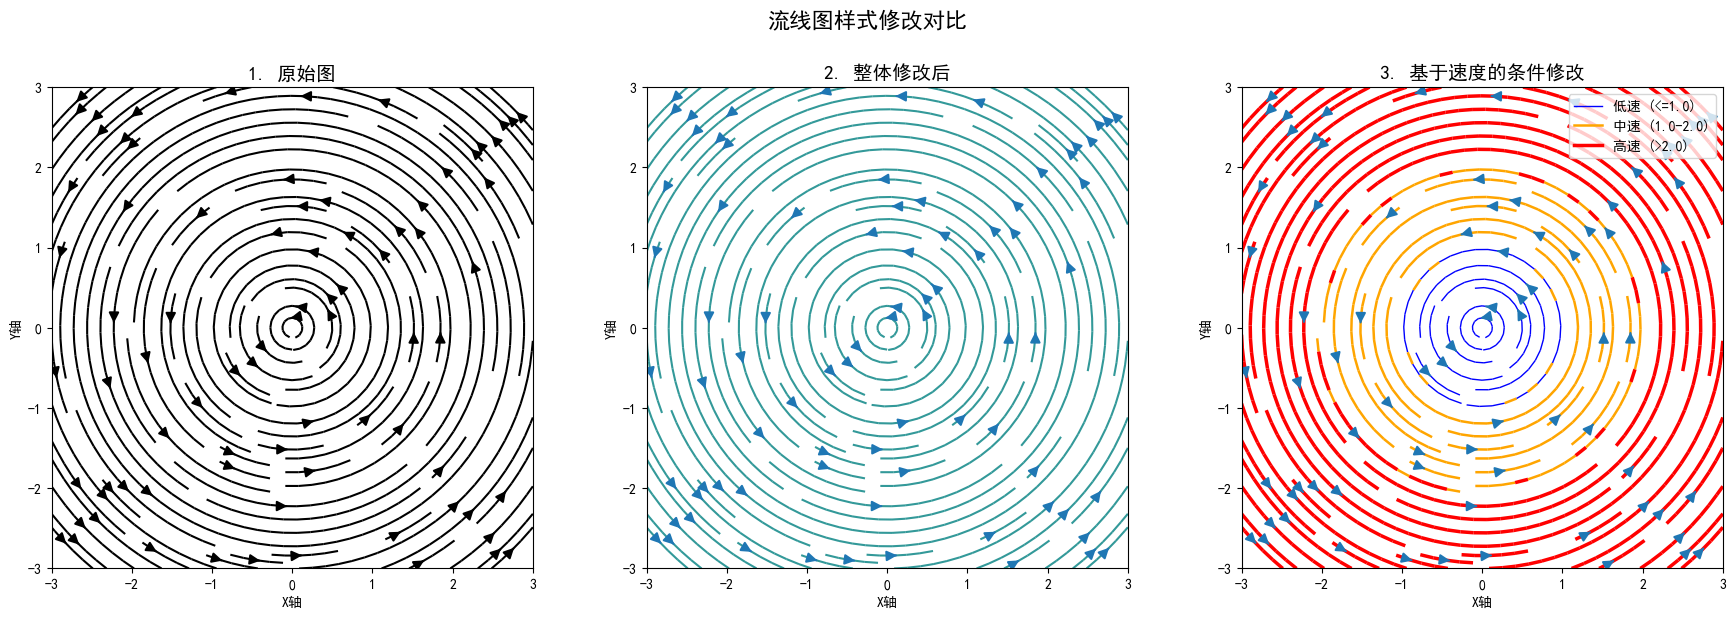

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据 - 漩涡场
x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
X, Y = np.meshgrid(x, y)

# 计算向量场（漩涡效果）
u = -Y
v = X
speed = np.sqrt(u**2 + v**2)  # 计算速度大小用于条件判断

# 创建包含三个子图的画布
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('流线图样式修改对比', fontsize=16, fontweight='bold')

# --------------------------
# 1. 原始流线图
# --------------------------
stream1 = ax1.streamplot(
    X, Y, u, v,
    density=1.2,
    arrowsize=1.5,
    color='black'
)
ax1.set_title('1. 原始图', fontsize=14)
ax1.set_xlabel('X轴')
ax1.set_ylabel('Y轴')
ax1.set_aspect('equal')

# --------------------------
# 2. 整体修改后的流线图
# --------------------------
stream2 = ax2.streamplot(
    X, Y, u, v,
    density=1.2,
    arrowsize=1.5
)

# 修改所有流线属性
stream2.lines.set_color('teal')
stream2.lines.set_linewidth(1.5)
stream2.lines.set_alpha(0.8)

# 修改所有箭头属性
stream2.arrows.set_color('crimson')
stream2.arrows.set_alpha(0.9)
stream2.arrows.set_linewidth(1.2)
stream2.arrows.set_zorder(3)  # 确保箭头在流线上方

ax2.set_title('2. 整体修改后', fontsize=14)
ax2.set_xlabel('X轴')
ax2.set_ylabel('Y轴')
ax2.set_aspect('equal')

# --------------------------
# 3. 基于条件修改特定流线
# --------------------------
stream3 = ax3.streamplot(
    X, Y, u, v,
    density=1.2,
    arrowsize=1.5
)

# 根据速度大小设置不同流线的颜色和宽度
# 获取流线的数量（通过路径数量判断）
num_paths = len(stream3.lines.get_paths())
# 存储每个流线的颜色和宽度
colors = []
linewidths = []

# 为每个流线设置属性（基于对应位置的速度）
for i in range(num_paths):
    # 获取当前流线的路径对象
    path = stream3.lines.get_paths()[i]
    # 计算路径中点的索引（取路径顶点的中间位置）
    mid_point_idx = int(len(path.vertices)/2)
    # 获取中点的坐标(x_mid, y_mid)
    x_mid, y_mid = path.vertices[mid_point_idx]
    
    # 找到与中点最接近的速度数据点索引
    # 计算x轴上与x_mid最接近的点的索引
    x_idx = np.argmin(np.abs(x - x_mid))
    # 计算y轴上与y_mid最接近的点的索引
    y_idx = np.argmin(np.abs(y - y_mid))
    # 获取该位置的速度值
    speed_val = speed[y_idx, x_idx]
    
    # 根据速度设置颜色和线宽
    if speed_val > 2.0:
        colors.append('red')
        linewidths.append(2.5)
    elif speed_val > 1.0:
        colors.append('orange')
        linewidths.append(1.8)
    else:
        colors.append('blue')
        linewidths.append(1.0)

# 应用条件样式
stream3.lines.set_color(colors)
stream3.lines.set_linewidth(linewidths)

ax3.set_title('3. 基于速度的条件修改', fontsize=14)
ax3.set_xlabel('X轴')
ax3.set_ylabel('Y轴')
ax3.set_aspect('equal')

# 添加颜色说明图例
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', lw=1.0, label='低速 (<=1.0)'),
    Line2D([0], [0], color='orange', lw=1.8, label='中速 (1.0-2.0)'),
    Line2D([0], [0], color='red', lw=2.5, label='高速 (>2.0)')
]
ax3.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### 示例 2：与其他图表结合，增加视觉效果

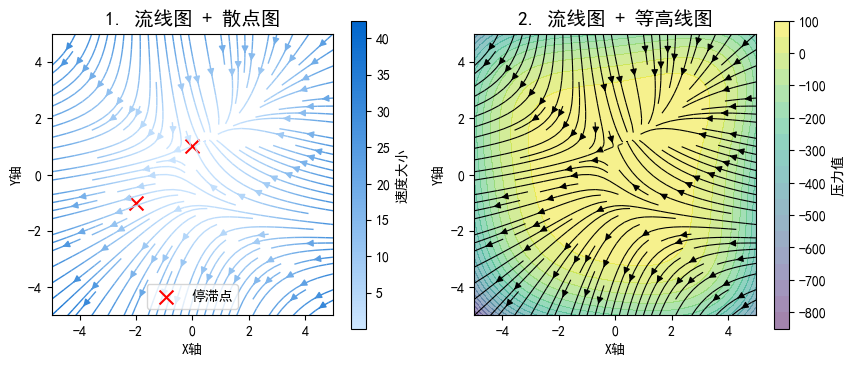

In [5]:
from matplotlib.colors import LinearSegmentedColormap

# 生成基础数据 - 模拟流体流动场景
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# 定义向量场（包含两个漩涡和一个中心障碍物）
u = -1 - X**2 + Y
v = 1 + X - Y**2

# 计算速度大小（用于颜色映射）
speed = np.sqrt(u**2 + v**2)

# 创建自定义颜色映射
colors = [(0.8, 0.9, 1), (0, 0.4, 0.8)]  # 浅蓝色到深蓝色
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

# 创建2x2的子图布局
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# --------------------------
# 1. 流线图 + 散点图（标记关键点）
# --------------------------
ax1 = axes[0]
# 绘制流线图
stream1 = ax1.streamplot(X, Y, u, v, density=1.2, color=speed, cmap=cmap, linewidth=1)
# 添加颜色条
cbar1 = fig.colorbar(stream1.lines, ax=ax1, shrink=0.5)
cbar1.set_label('速度大小')

# 标记特殊点（停滞点和最大速度点）
stagnation_points = np.array([[0, 1], [-2, -1]])  # 停滞点坐标
max_speed_idx = np.unravel_index(np.argmax(speed), speed.shape)
max_speed_point = np.array([X[max_speed_idx], Y[max_speed_idx]])

# 绘制散点
ax1.scatter(stagnation_points[:, 0], stagnation_points[:, 1], 
           c='red', s=100, marker='x', label='停滞点')

ax1.set_title('1. 流线图 + 散点图', fontsize=14)
ax1.set_xlabel('X轴')
ax1.set_ylabel('Y轴')
ax1.legend()
ax1.set_aspect('equal')

# --------------------------
# 2. 流线图 + 等高线图（叠加标量场）
# --------------------------
ax2 = axes[1]
# 计算压力场（模拟数据，与速度成反比）
pressure = 100 - 0.5 * speed**2

# 绘制填充等高线图表示压力场
contour = ax2.contourf(X, Y, pressure, 20, cmap='viridis', alpha=0.5)
cbar2 = fig.colorbar(contour, ax=ax2, shrink=0.5)
cbar2.set_label('压力值')

# 在等高线图上叠加流线图
stream2 = ax2.streamplot(X, Y, u, v, density=1.2, color='black', linewidth=0.8, arrowsize=1)

ax2.set_title('2. 流线图 + 等高线图', fontsize=14)
ax2.set_xlabel('X轴')
ax2.set_ylabel('Y轴')
ax2.set_aspect('equal')

plt.show()